# Task
Task 2: Exploratory Data Analysis (EDA)

1.Generate summary statistics (mean, median, std, etc.).
2.Create histograms and boxplots for numeric features.
3.Use pairplot/correlation matrix for feature relationships.
4.Identify patterns, trends, or anomalies in the data.
5.Make basic feature-level inferences from visuals.



Here is all the data you need:
"Titanic-Dataset.csv"

In [1]:
import pandas as pd

try:
    titanic_df = pd.read_csv('Titanic-Dataset.csv')
    display(titanic_df.head())
except FileNotFoundError:
    print("Error: 'Titanic-Dataset.csv' not found.")
    titanic_df = None  # or handle the error appropriately
except pd.errors.ParserError:
    print("Error: Unable to parse 'Titanic-Dataset.csv'. Check file format.")
    titanic_df = None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Check the shape of the DataFrame.
print("Shape of the DataFrame:", titanic_df.shape)

# Examine the data types of each column.
print("\nData Types of each column:\n", titanic_df.dtypes)

# Identify missing values.
missing_values = titanic_df.isnull().sum()
percentage_missing = (missing_values / len(titanic_df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, '% of Total Values': percentage_missing})

print("\nMissing values:\n", missing_data)

# Summarize the findings.
print("\nSummary:")
print(f"  - The DataFrame has {titanic_df.shape[0]} rows and {titanic_df.shape[1]} columns.")
print("  - Data types:\n", titanic_df.dtypes)
print("  - Missing Values:\n", missing_data)

Shape of the DataFrame: (891, 12)

Data Types of each column:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Missing values:
              Missing Values  % of Total Values
PassengerId               0           0.000000
Survived                  0           0.000000
Pclass                    0           0.000000
Name                      0           0.000000
Sex                       0           0.000000
Age                     177          19.865320
SibSp                     0           0.000000
Parch                     0           0.000000
Ticket                    0           0.000000
Fare                      0           0.000000
Cabin                   687          77.104377
Embarked                  2           0.224467

Summary:
  - The 

In [12]:
# Strip column names to remove hidden spaces
titanic_df.columns = titanic_df.columns.str.strip()

# Handle missing values using explicit assignment
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())

titanic_df['Cabin'] = titanic_df['Cabin'].fillna('Unknown')

titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

# Verify missing values are handled
print(titanic_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [13]:
# Impute missing 'Age' values with the median.
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())

# Fill missing 'Cabin' values with 'Unknown'.
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('Unknown')

# Impute missing 'Embarked' values with the mode.
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

# Verify that no missing values remain.
missing_values_after_imputation = titanic_df.isnull().sum()
print(missing_values_after_imputation)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [14]:
# Select numerical features. Exclude 'PassengerId' and 'Survived' as they are not relevant for summary statistics
numerical_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
numerical_df = titanic_df[numerical_features]

# Generate summary statistics.
summary_statistics = numerical_df.describe()
display(summary_statistics)

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


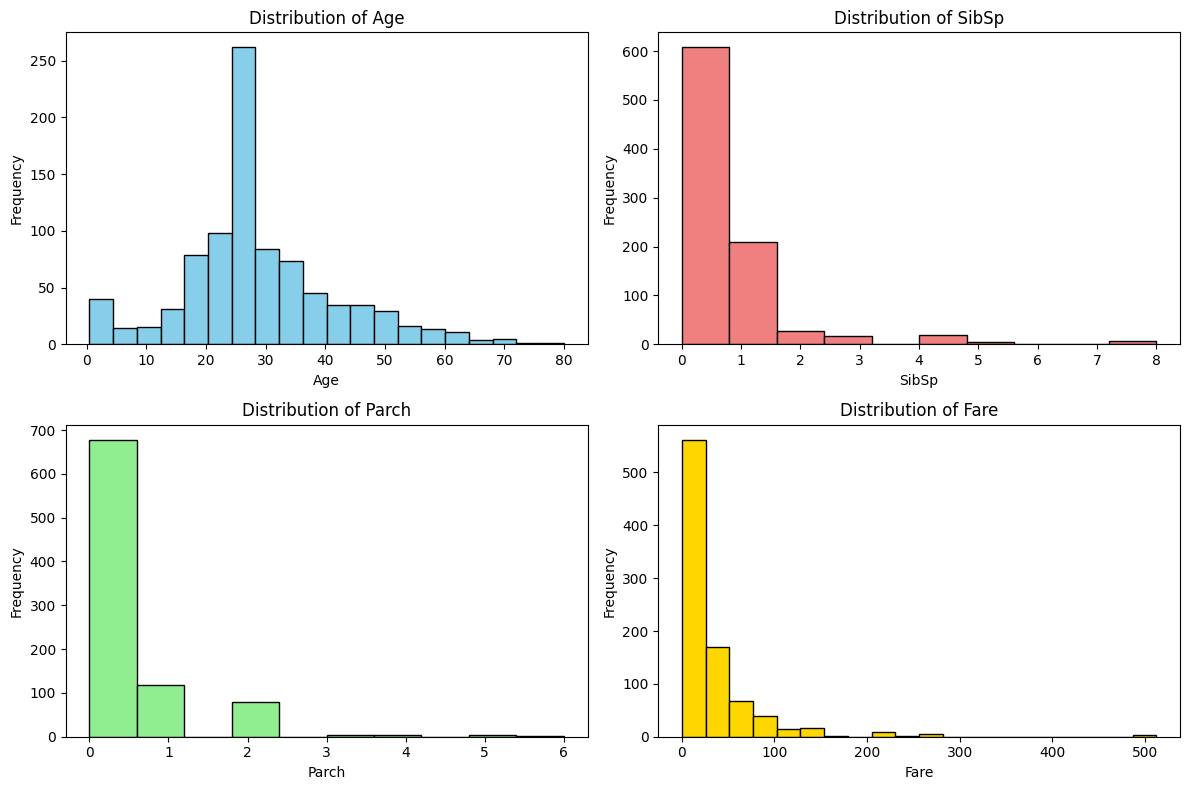

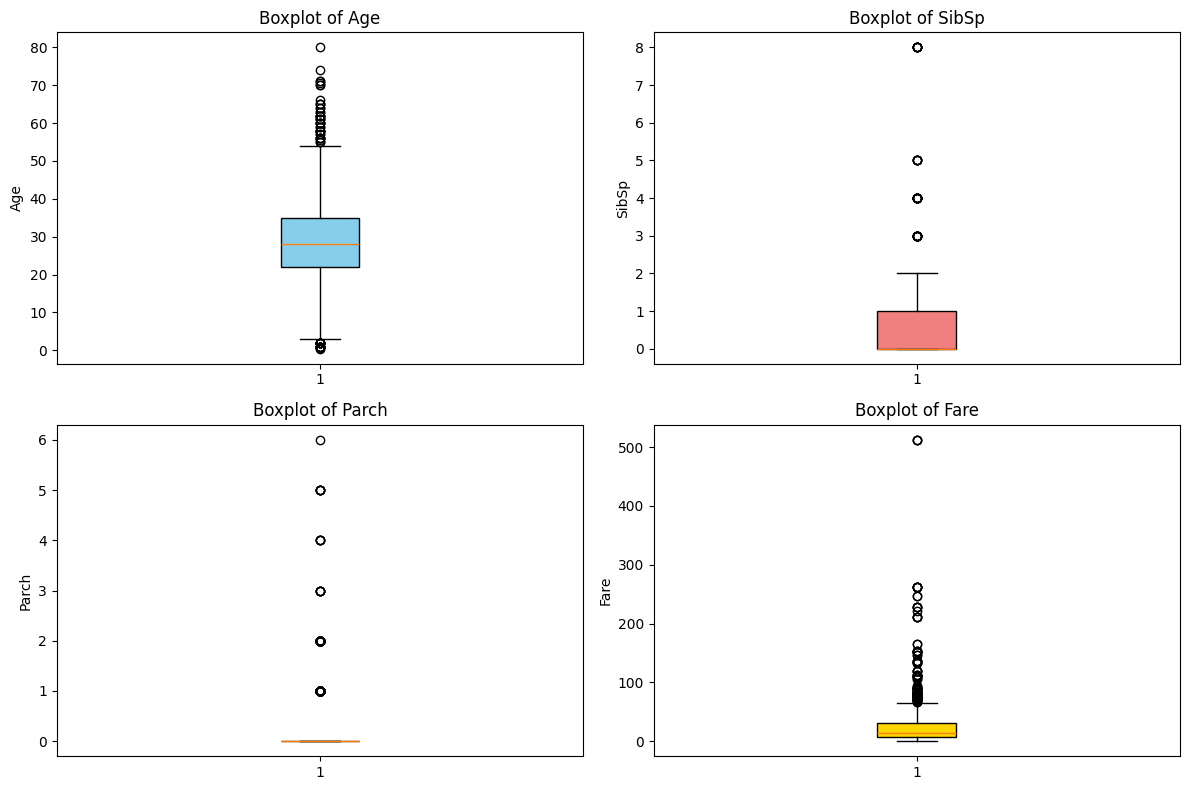

In [15]:
import matplotlib.pyplot as plt

# Create histograms for numerical features
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(titanic_df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

plt.subplot(2, 2, 2)
plt.hist(titanic_df['SibSp'], bins=10, color='lightcoral', edgecolor='black')
plt.xlabel('SibSp')
plt.ylabel('Frequency')
plt.title('Distribution of SibSp')

plt.subplot(2, 2, 3)
plt.hist(titanic_df['Parch'], bins=10, color='lightgreen', edgecolor='black')
plt.xlabel('Parch')
plt.ylabel('Frequency')
plt.title('Distribution of Parch')

plt.subplot(2, 2, 4)
plt.hist(titanic_df['Fare'], bins=20, color='gold', edgecolor='black')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fare')

plt.tight_layout()
plt.show()

# Create boxplots for numerical features
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.boxplot(titanic_df['Age'], patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.ylabel('Age')
plt.title('Boxplot of Age')

plt.subplot(2, 2, 2)
plt.boxplot(titanic_df['SibSp'], patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.ylabel('SibSp')
plt.title('Boxplot of SibSp')

plt.subplot(2, 2, 3)
plt.boxplot(titanic_df['Parch'], patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.ylabel('Parch')
plt.title('Boxplot of Parch')

plt.subplot(2, 2, 4)
plt.boxplot(titanic_df['Fare'], patch_artist=True, boxprops=dict(facecolor='gold'))
plt.ylabel('Fare')
plt.title('Boxplot of Fare')

plt.tight_layout()
plt.show()

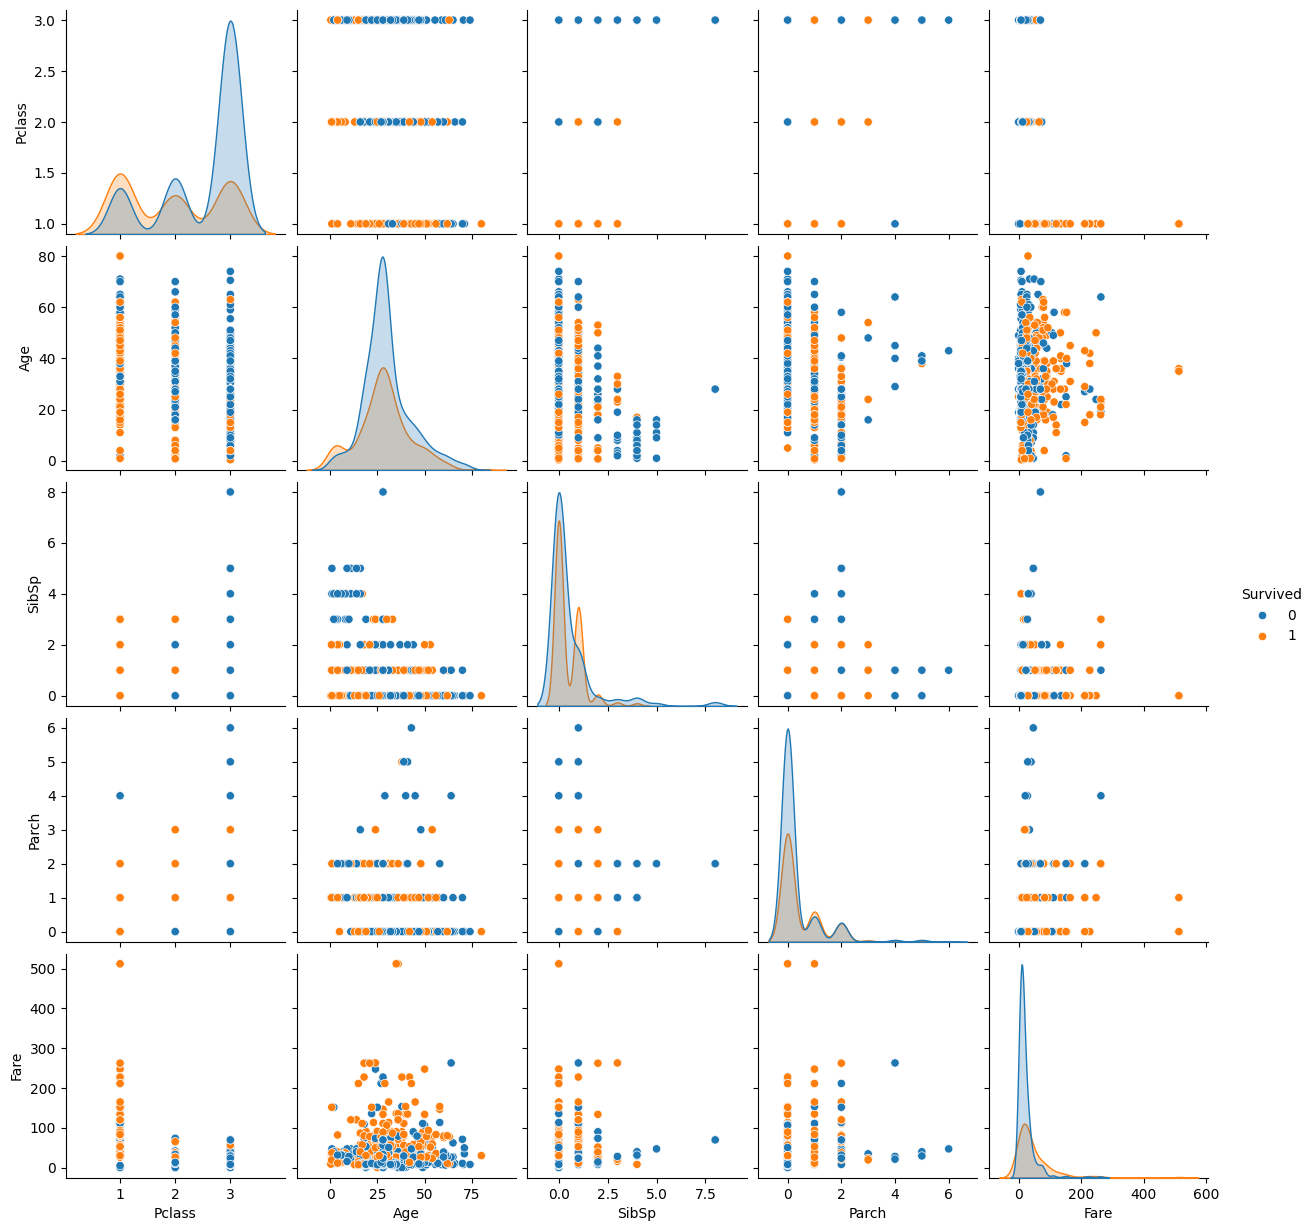

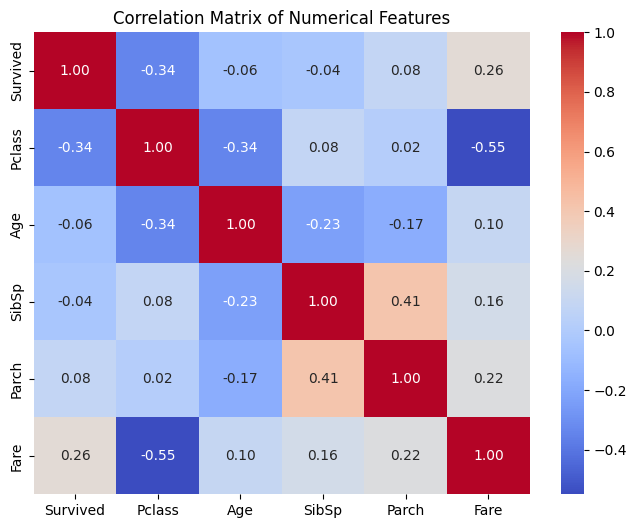

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features for the pairplot
numerical_features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
sns.pairplot(titanic_df[numerical_features], hue='Survived')
plt.show()

# Calculate the correlation matrix
correlation_matrix = titanic_df[numerical_features].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [19]:
# Analyze the relationship between survival and passenger class (Pclass).
print("Survival rate by passenger class:")
print(titanic_df.groupby('Pclass')['Survived'].mean())

# Analyze the relationship between survival and sex.
print("\nSurvival rate by sex:")
print(titanic_df.groupby('Sex')['Survived'].mean())

# Analyze the relationship between survival and age.
print("\nSurvival rate by age group:")
age_groups = pd.cut(titanic_df['Age'], bins=[0, 18, 30, 50, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
print(titanic_df.groupby(age_groups)['Survived'].mean())

# Analyze the relationship between survival and fare.
print("\nSurvival rate by fare group:")
fare_groups = pd.qcut(titanic_df['Fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
print(titanic_df.groupby(fare_groups)['Survived'].mean())

print("\nSurvival rate by embarkation port:")
print(titanic_df.groupby('Embarked')['Survived'].mean())

print("\nSurvival rate by number of siblings/spouses:")
print(titanic_df.groupby('SibSp')['Survived'].mean())

print("\nSurvival rate by number of parents/children:")
print(titanic_df.groupby('Parch')['Survived'].mean())



Survival rate by passenger class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival rate by sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival rate by age group:
Age
Child          0.503597
Young Adult    0.331096
Adult          0.423237
Senior         0.343750
Name: Survived, dtype: float64

Survival rate by fare group:
Fare
Low          0.197309
Medium       0.303571
High         0.454955
Very High    0.581081
Name: Survived, dtype: float64

Survival rate by embarkation port:
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

Survival rate by number of siblings/spouses:
SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

Survival rate by number of parents/children:
Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: floa

<ipython-input-19-b752f41b65cf>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(titanic_df.groupby(age_groups)['Survived'].mean())
<ipython-input-19-b752f41b65cf>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(titanic_df.groupby(fare_groups)['Survived'].mean())
